<a href="https://colab.research.google.com/github/Yogitha-2006/student_performance_prediction/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn joblib matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import joblib


In [3]:
# Create a sample dataset
np.random.seed(42)

data = {
    "study_hours": np.random.randint(1, 10, 200),
    "attendance": np.random.randint(50, 100, 200),
    "previous_score": np.random.randint(30, 100, 200),
    "sleep_hours": np.random.randint(4, 10, 200),
    "internet_usage": np.random.randint(1, 6, 200),
}

df = pd.DataFrame(data)

# Make target column (final exam score)
df["final_score"] = (
    df["study_hours"] * 5
    + df["attendance"] * 0.3
    + df["previous_score"] * 0.5
    + np.random.randint(-10, 10, 200)
)

# Classification target: pass/fail
df["pass_fail"] = df["final_score"].apply(lambda x: 1 if x >= 50 else 0)

df.head()


,study_hours,attendance,previous_score,sleep_hours,internet_usage,final_score,pass_fail
0,7,50,38,7,3,73.0,1
1,4,60,41,6,3,55.5,1
2,8,77,30,9,3,78.1,1
3,5,74,87,4,3,91.7,1
4,7,99,30,4,4,80.7,1


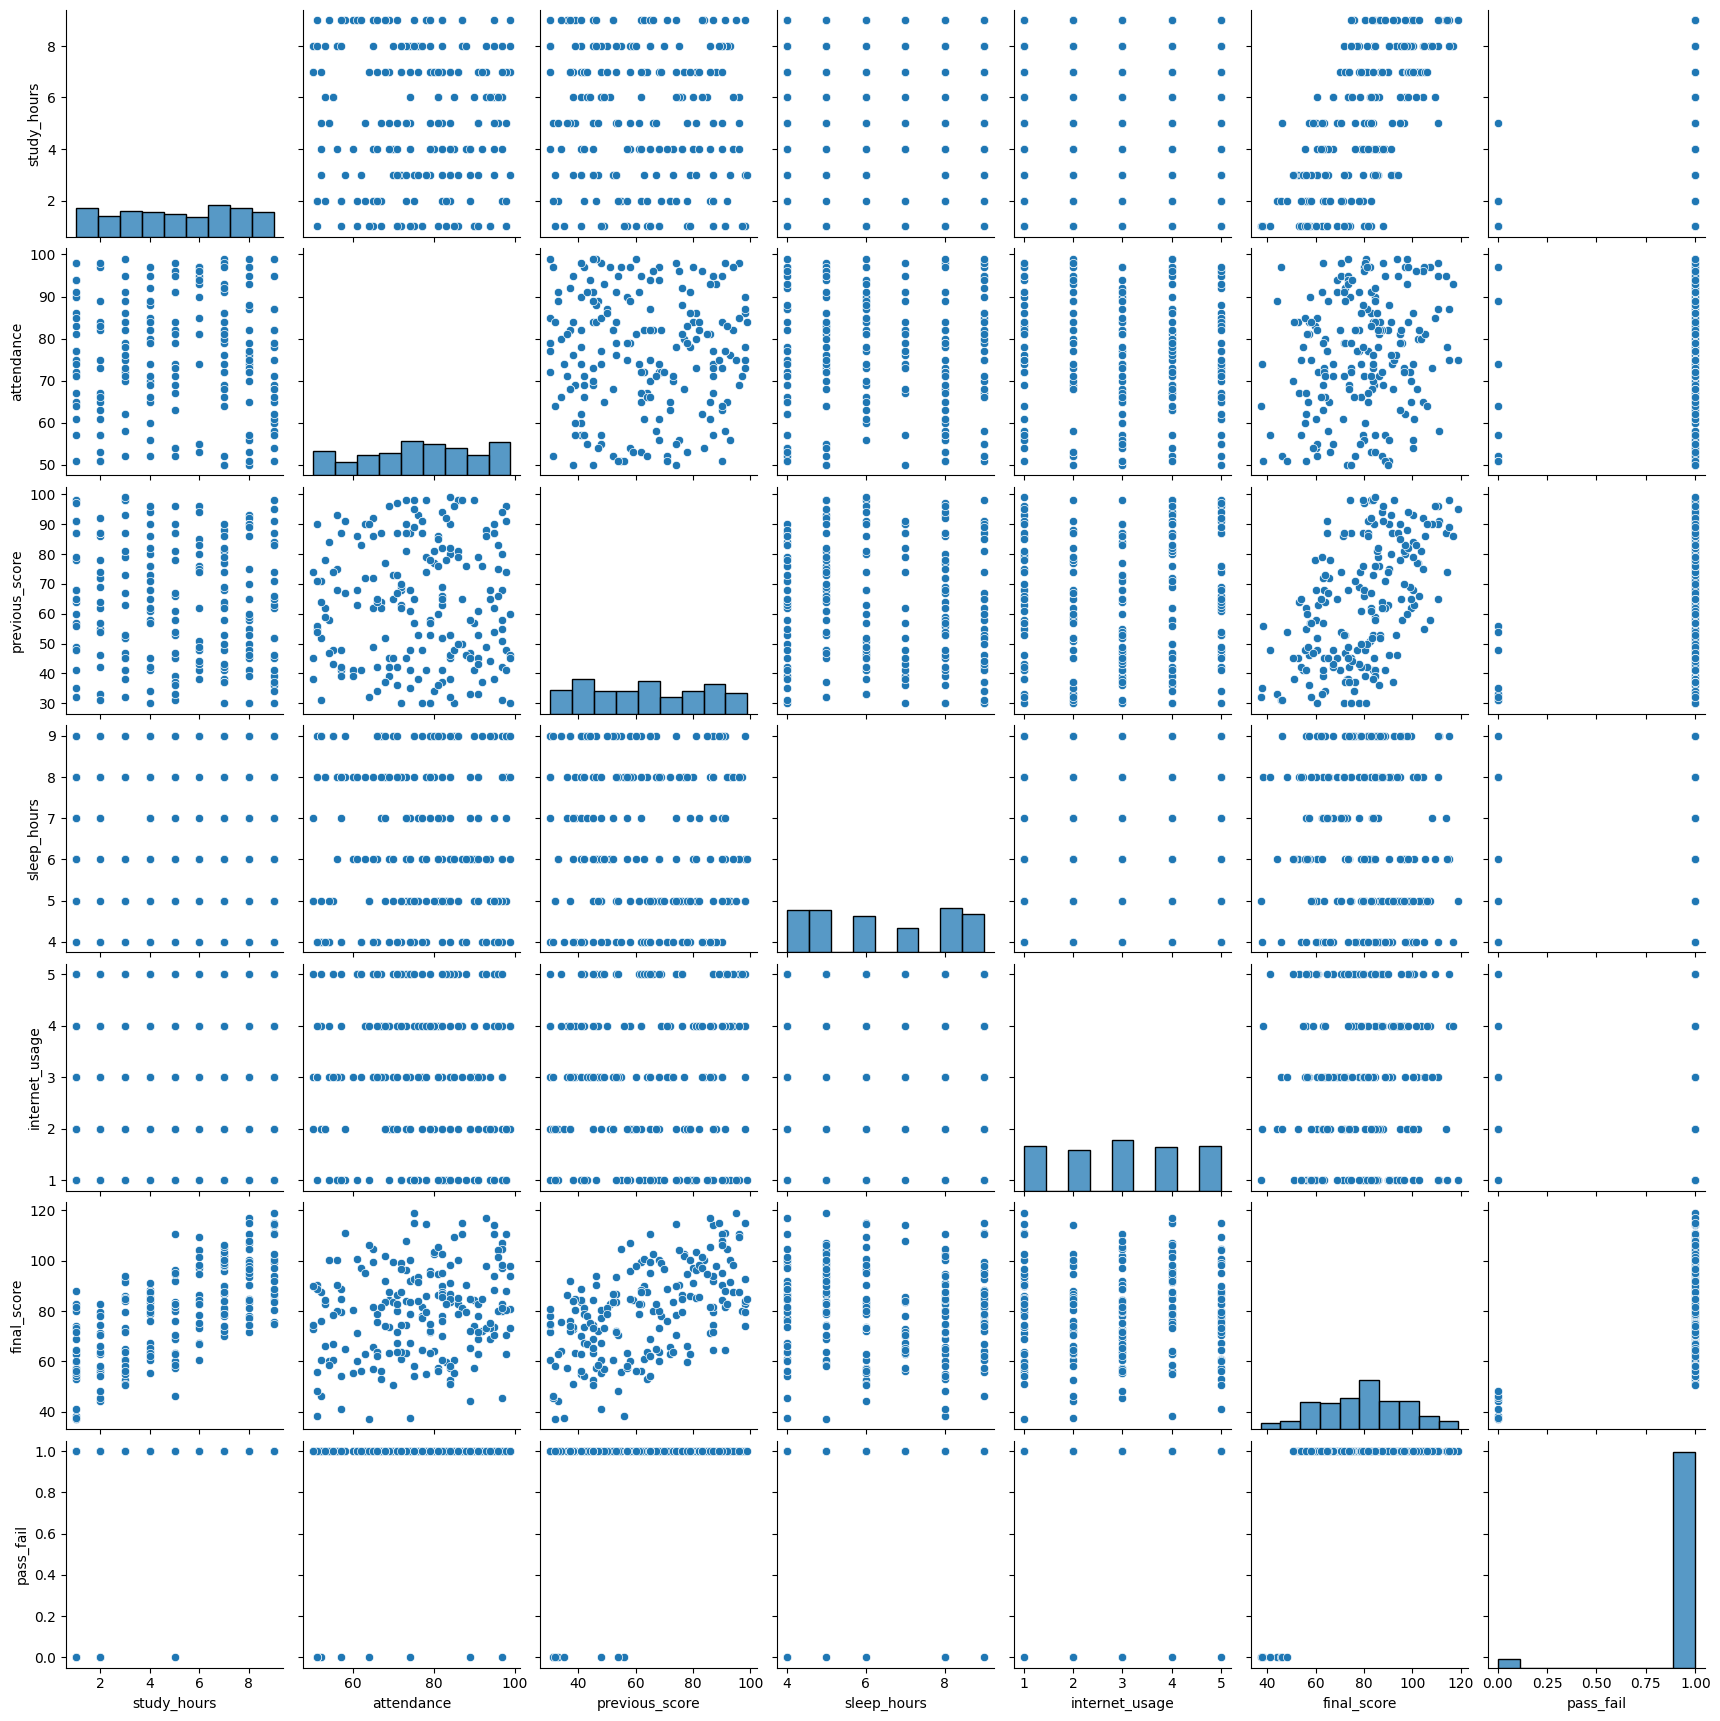

In [4]:
sns.pairplot(df)
plt.show()


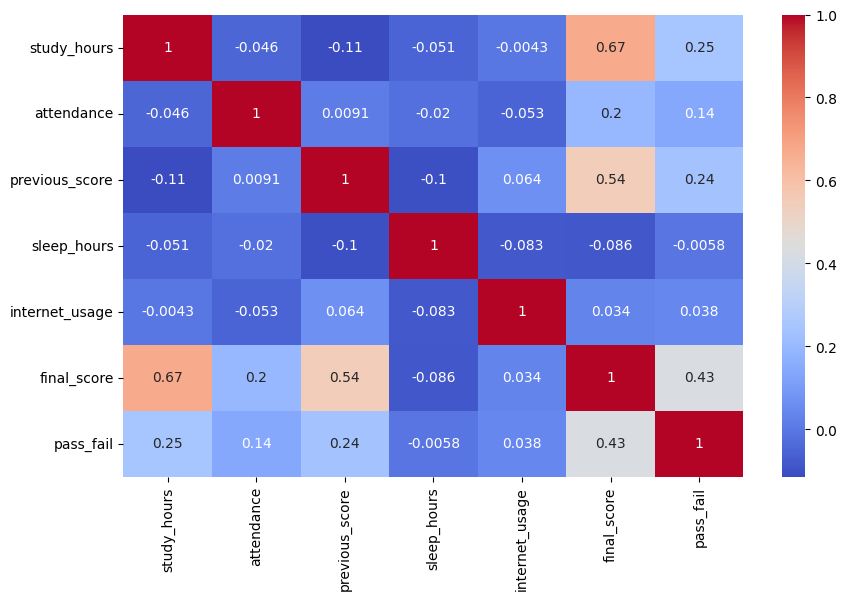

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [6]:
def preprocess(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
X_train, X_test, y_train, y_test = preprocess(df, "final_score")

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

preds = reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R² Score:", r2_score(y_test, preds))


MSE: 41.118285607253426
R² Score: 0.828806124111509


In [8]:
X_train_c, X_test_c, y_train_c, y_test_c = preprocess(df, "pass_fail")

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_c, y_train_c)

preds_c = clf.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, preds_c))
print("\nClassification Report:\n", classification_report(y_test_c, preds_c))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        38

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [9]:
joblib.dump(reg_model, "regression_model.pkl")
joblib.dump(clf, "classification_model.pkl")

print("Models saved successfully!")


Models saved successfully!
